<a href="https://colab.research.google.com/github/BharatArora2006/Ride_Hailing_Company_Churn_Ensemble/blob/main/Ride_hailing_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTEXT & BUSINESS PROBLEM
Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ride hailing companies. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to other Ride hailing companies depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, XYZ (A famous Ride hailing companies) is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of XYZ, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
## Reading the dataset
XYZ = pd.read_csv("/content/XYZ_driver_data.csv")
XYZ_orig = XYZ.copy()

# EDA

In [ ]:
XYZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
## Shape of Dataset
XYZ.shape

(19104, 14)

In [ ]:
## Viewing sample data
XYZ.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
## Checking Null values
print(XYZ.isnull().sum()/len(XYZ)*100)

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64


# There are null values for 3 Features - Age, Gender and Last Working Date.


1.   Since Age Null values are very less ,so  null values will be dropped
2.   Since Gender Null values are very less ,so null values will be dropped
3.   LWD is expected to be null since every 'driver' have multiple records.
     Only 1 record for one driver is expected to have LWD as Non Null.
     We will be grouping the records and finally we will keep LWD values as
     Non value, so this problem will be solved then.


## Addressing Null Values for Age and Gender

In [ ]:
XYZ.dropna(subset=['Age','Gender'], inplace = True)

In [ ]:
## Validating Null values for Age and Gender
print(XYZ.isnull().sum()/len(XYZ)*100)

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.543363
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64


In [ ]:
## Dropping off the unnamed column as its not needed.
XYZ = XYZ.drop("Unnamed: 0",axis=1)

In [ ]:
## Checking the data after Drop
XYZ.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
## Checking Datatypes
XYZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18991 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                18991 non-null  object 
 1   Driver_ID             18991 non-null  int64  
 2   Age                   18991 non-null  float64
 3   Gender                18991 non-null  float64
 4   City                  18991 non-null  object 
 5   Education_Level       18991 non-null  int64  
 6   Income                18991 non-null  int64  
 7   Dateofjoining         18991 non-null  object 
 8   LastWorkingDate       1606 non-null   object 
 9   Joining Designation   18991 non-null  int64  
 10  Grade                 18991 non-null  int64  
 11  Total Business Value  18991 non-null  int64  
 12  Quarterly Rating      18991 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


## Converting DataTypes

In [ ]:
## Converting Dates
date_columns = ['MMM-YY','Dateofjoining','LastWorkingDate']
for i in date_columns:
  XYZ[i] = pd.to_datetime(XYZ[i])
XYZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18991 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                18991 non-null  datetime64[ns]
 1   Driver_ID             18991 non-null  int64         
 2   Age                   18991 non-null  float64       
 3   Gender                18991 non-null  float64       
 4   City                  18991 non-null  object        
 5   Education_Level       18991 non-null  int64         
 6   Income                18991 non-null  int64         
 7   Dateofjoining         18991 non-null  datetime64[ns]
 8   LastWorkingDate       1606 non-null   datetime64[ns]
 9   Joining Designation   18991 non-null  int64         
 10  Grade                 18991 non-null  int64         
 11  Total Business Value  18991 non-null  int64         
 12  Quarterly Rating      18991 non-null  int64         
dtypes: datetime64[ns

## Grouping by Driver to have only 1 record per Driver. We will use

1.   Age as Last
2.   City as Last
3.   Education_Level as LAST
4.   Income as Average
5.   DateofJoining as FIRST
6.   LastWorkingDate as LAST
7.   Joining Designation as FIRST
8.   Grade as Max
9.   Total Business as SUM
10.   Quarterly Rating as AVERAGE


In [ ]:
XYZ.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

# Boxplot for numerical columns - Age, Income, Grade and Total Business Value

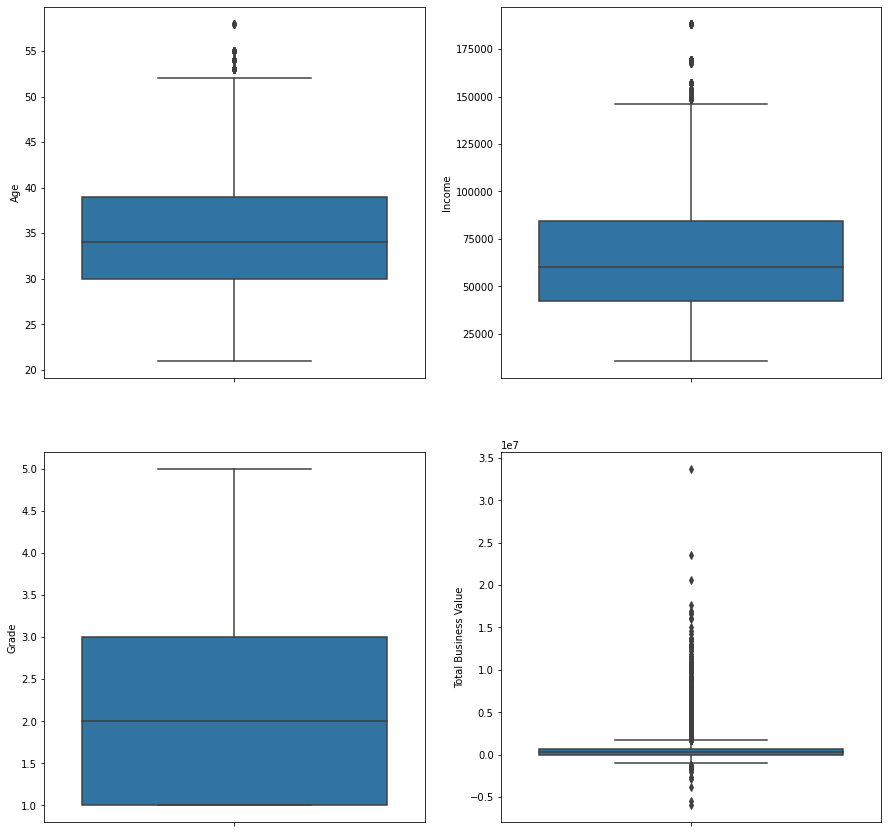

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15,15))
sns.boxplot( y = 'Age', data = XYZ, ax = axes[0,0])
sns.boxplot( y = 'Income', data = XYZ, ax = axes[0,1])
sns.boxplot( y = 'Grade', data = XYZ, ax = axes[1,0])
sns.boxplot( y = 'Total Business Value', data = XYZ, ax = axes[1,1])

# Handle the outliers using IQR method

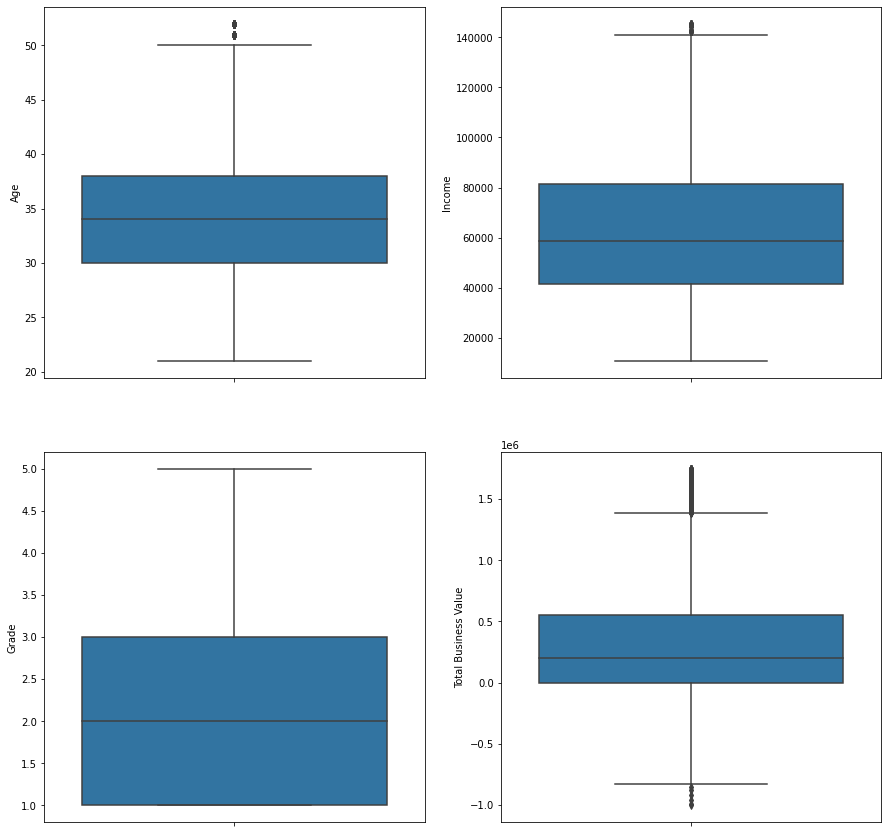

In [ ]:
num_cols = ['Age','Income','Grade','Total Business Value']
q1 = XYZ[num_cols].quantile(0.25)
q3 = XYZ[num_cols].quantile(0.75)
IQR = q3-q1
XYZ = XYZ[~((XYZ[num_cols]<(q1 - 1.5 * IQR)) | (XYZ[num_cols] > (q3 + 1.5 * IQR))).any(axis=1)]
XYZ.reset_index(drop = True)
XYZ

fig, axes = plt.subplots(2, 2, figsize = (15,15))
sns.boxplot( y = 'Age', data = XYZ, ax = axes[0,0])
sns.boxplot( y = 'Income', data = XYZ, ax = axes[0,1])
sns.boxplot( y = 'Grade', data = XYZ, ax = axes[1,0])
sns.boxplot( y = 'Total Business Value', data = XYZ, ax = axes[1,1])

# Univariate Analysis

In [ ]:
XYZ.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

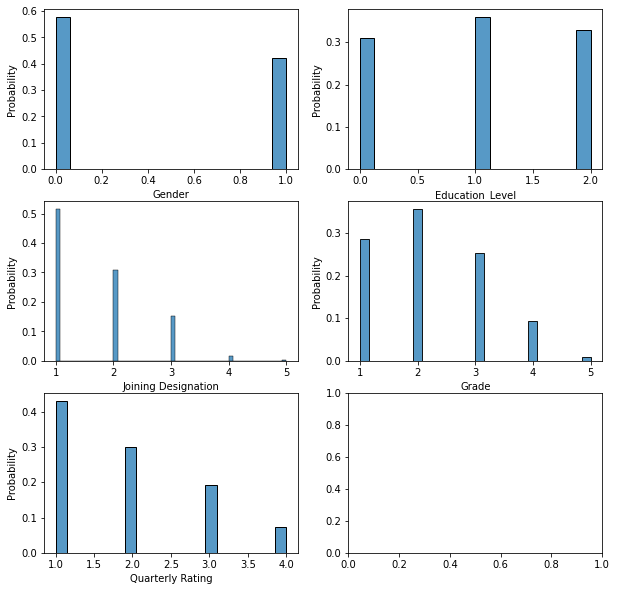

In [ ]:
fig,axes = plt.subplots(3,2, figsize = (10,10))
sns.histplot(data= XYZ, x = 'Gender', stat = 'probability', ax=axes[0,0])
sns.histplot(data= XYZ, x = 'Education_Level', stat = 'probability', ax=axes[0,1])
sns.histplot(data= XYZ, x = 'Joining Designation', stat = 'probability', ax=axes[1,0])
sns.histplot(data= XYZ, x = 'Grade', stat = 'probability', ax=axes[1,1])
sns.histplot(data= XYZ, x = 'Quarterly Rating', stat = 'probability', ax=axes[2,0])


# Observations


*   Ratio of Male vs Female Driver is around 58% vs 42%
*   The count of Drivers into different education level categories is almost close. The maximum number of Drivers are 12+, then Graduate. 10+ has lowest count.
*   50% of the Drivers were joined at Designation = 1.
*   Around 40% of the Drivers have Grade = 2, followed by Grade 1. Grade 5 has least no. of Drivers
*   There is no Driver with quarterly rating of 5 which is considered as best rating.. Maximum Drivers (around 45%) have bad rating of 1. Around 30% of Drivers have atleast average quarterly rating .





In [ ]:
print(XYZ.shape)
XYZ_groupby_dict = {
    'MMM-YY' : 'max',
    'Age' : 'last',
    'Gender' :'last',
    'City':'last',
    'Education_Level':'last',
    'Income':['first','last'],
    'Dateofjoining':'first',
    'LastWorkingDate':'last',
    'Joining Designation':'first',
    'Grade':'last',
    'Total Business Value':'sum',
    'Quarterly Rating':['first','last']
  }
XYZ2 = XYZ.groupby('Driver_ID').agg(XYZ_groupby_dict).reset_index().drop_duplicates()
XYZ2.head(10)
XYZ3 = pd.DataFrame()
XYZ3[['Driver_id','Age','Gender','City','Education_Level','Dateofjoining','LastWorkingDate','Joining Designation','Grade','Total Business Value']] = XYZ2[['Driver_ID','Age','Gender','City','Education_Level','Dateofjoining','LastWorkingDate','Joining Designation','Grade','Total Business Value']]
XYZ3['Income_first'] = XYZ2['Income']['first']
XYZ3['Income_last'] = XYZ2['Income']['last']
XYZ3['QR_first'] = XYZ2['Quarterly Rating']['first']
XYZ3['QR_last'] = XYZ2['Quarterly Rating']['last']
XYZ3



(17421, 13)


,Driver_id,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last
0,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1,-665480,57387,57387,2,2
1,2,31.0,0.0,C7,2,2020-11-06,NaT,2,2,0,67016,67016,1,1
2,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,2,350000,65603,65603,1,1
3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,1,120360,46368,46368,1,1
4,6,31.0,1.0,C11,1,2020-07-31,NaT,3,3,1265000,78728,78728,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2784,34.0,0.0,C24,0,2015-10-15,NaT,2,3,10037490,82815,82815,3,4
2364,2785,34.0,1.0,C9,0,2020-08-28,2020-10-28,1,1,0,12105,12105,1,1
2365,2786,45.0,0.0,C19,0,2018-07-31,2019-09-22,2,2,2815090,35370,35370,2,1
2366,2787,28.0,1.0,C20,2,2018-07-21,2019-06-20,1,1,977830,69498,69498,2,1


## Feature Engineering
## 1 - Increased, 0 - Not Increased

In [ ]:
## Featuer Engineering  - Calculating New Fields = difference of last Income and first Income , Difference of last Qtr rating and first Qtr rating.
## Deriving further if Rating and income has increased  or not. if Increased  - value will be 1 else 0.

XYZ3['Income_increase'] = XYZ3['Income_first'] - XYZ3['Income_last']
XYZ3['Rating_increase'] = XYZ3['QR_last']- XYZ3['QR_first']
XYZ3["Income_increase"] = np.where(XYZ3["Income_increase"] <= 0, 0, 1)
XYZ3["Rating_increase"] = np.where(XYZ3["Rating_increase"] <= 0, 0, 1)
XYZ3.head()

,Driver_id,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last,Income_increase,Rating_increase
0,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1,-665480,57387,57387,2,2,0,0
1,2,31.0,0.0,C7,2,2020-11-06,NaT,2,2,0,67016,67016,1,1,0,0
2,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,2,350000,65603,65603,1,1,0,0
3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,1,120360,46368,46368,1,1,0,0
4,6,31.0,1.0,C11,1,2020-07-31,NaT,3,3,1265000,78728,78728,1,2,0,1


In [ ]:
##Creating Target Feature 'Churn' using "Last Working Day". If LWD is null, Churn =0 i.e employee is still with XYZ else Churn = 1 i.e. Employee has left XYZ.
XYZ3['Churn'] = np.where(XYZ3['LastWorkingDate'].isnull()==True,0,1)

## Calculating Tenure of the Driver with XYZ (If Left XYZ - LWD - DOJ, else current Date - DOJ)
from dateutil import relativedelta
from datetime import date

XYZ3['Tenure'] = np.where(XYZ3['Churn']==1, XYZ3['LastWorkingDate'] - XYZ3['Dateofjoining'], pd.to_datetime(date.today()) - XYZ3['Dateofjoining'])
XYZ3['Tenure']= XYZ3['Tenure']/np.timedelta64(1,'Y')

## Since Target variable 'Churn' has been created so there is no need for 'LastWorkingDate', so dropping it.
## Also Since Tenure has been created basis DOJ, so DOJ is not needed.
XYZ3.drop((['Dateofjoining','LastWorkingDate']),axis = 1, inplace = True),
XYZ3.head(10)

,Driver_id,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last,Income_increase,Rating_increase,Churn,Tenure
0,1,28.0,0.0,C23,2,1,1,-665480,57387,57387,2,2,0,0,1,0.210819
1,2,31.0,0.0,C7,2,2,2,0,67016,67016,1,1,0,0,0,2.160209
2,4,43.0,0.0,C13,2,2,2,350000,65603,65603,1,1,0,0,1,0.388783
3,5,29.0,0.0,C9,0,1,1,120360,46368,46368,1,1,0,0,1,0.156061
4,6,31.0,1.0,C11,1,3,3,1265000,78728,78728,1,2,0,1,0,2.428524
5,8,34.0,0.0,C2,0,3,3,0,70656,70656,1,1,0,0,1,0.156061
6,11,28.0,1.0,C19,2,1,1,0,42172,42172,1,1,0,0,0,2.075334
7,12,35.0,0.0,C23,2,1,1,2607180,28116,28116,4,1,0,0,1,0.479134
8,13,31.0,0.0,C19,2,1,4,10213040,119227,119227,1,1,0,0,1,5.497717
9,14,39.0,1.0,C26,0,3,3,0,19734,19734,1,1,0,0,0,2.217705


In [ ]:
XYZ3['Tenure'].describe()

count    2368.000000
mean        1.842488
std         1.960778
min         0.000000
25%         0.353190
50%         1.014395
75%         2.553098
max         9.760638
Name: Tenure, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ffbe22160>]],
      dtype=object)

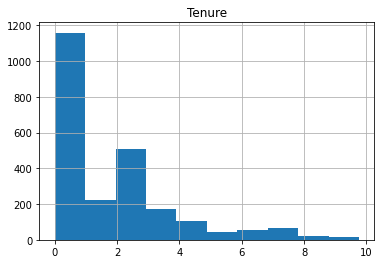

In [ ]:
XYZ3.hist(column = 'Tenure')

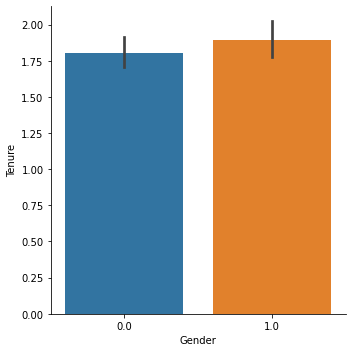

In [ ]:
sns.catplot(data=XYZ3, x="Gender", y="Tenure",  kind="bar")

# Analysis of Tenure
*   The average Tenure of a XYZ driver is 1.8 Years
*   75% of Drivers have less than 2.55 years of job in XYZ.
*   There is not much difference between experience of Drivers basis Gender

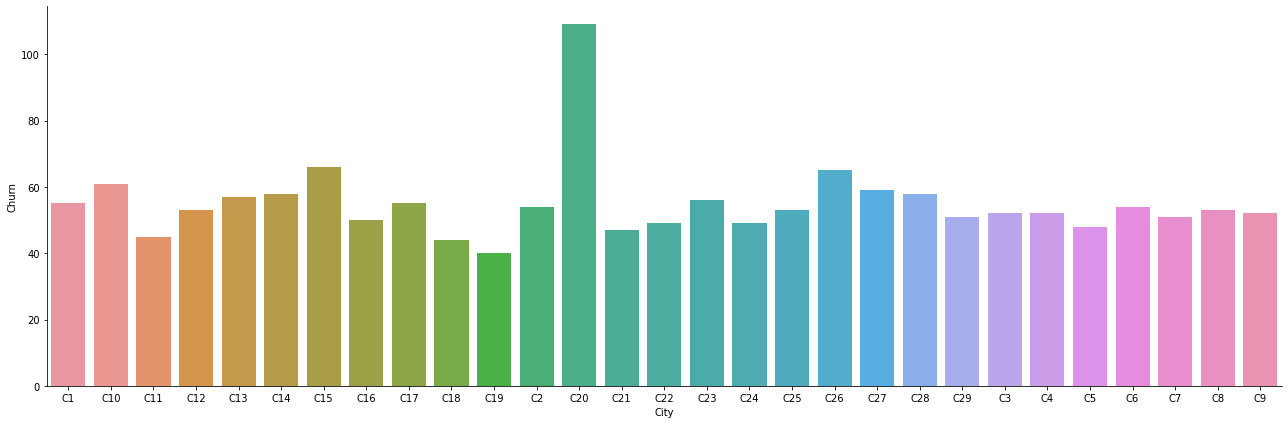

In [ ]:
XYZ_city = XYZ3[XYZ3["Churn"] == 1]
XYZ_city = XYZ_city.groupby('City').agg({'Churn':'sum'}).reset_index().drop_duplicates()
sns.catplot(data=XYZ_city, x="City", y="Churn",  kind="bar", height=6, aspect=3)

# Analysis of City and Churn
*   City 20 has highest Driver Churn which is exceptionally high.

# Analysis of Education and Churn

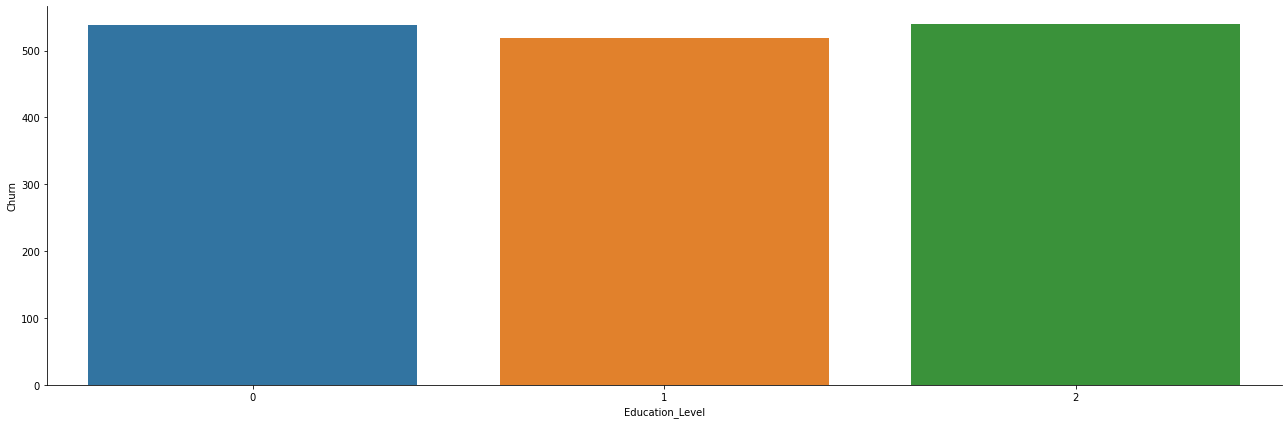

In [ ]:
XYZ_Education = XYZ3[XYZ3["Churn"] == 1]
XYZ_Education = XYZ_Education.groupby('Education_Level').agg({'Churn':'sum'}).reset_index().drop_duplicates()
sns.catplot(data=XYZ_Education, x="Education_Level", y="Churn",  kind="bar", height=6, aspect=3)

Least Churn is with Driver with education level of 1 (i.e. 12+)

0.0    1394
1.0     974
Name: Gender, dtype: int64
0.0    937
1.0    659
Name: Gender, dtype: int64


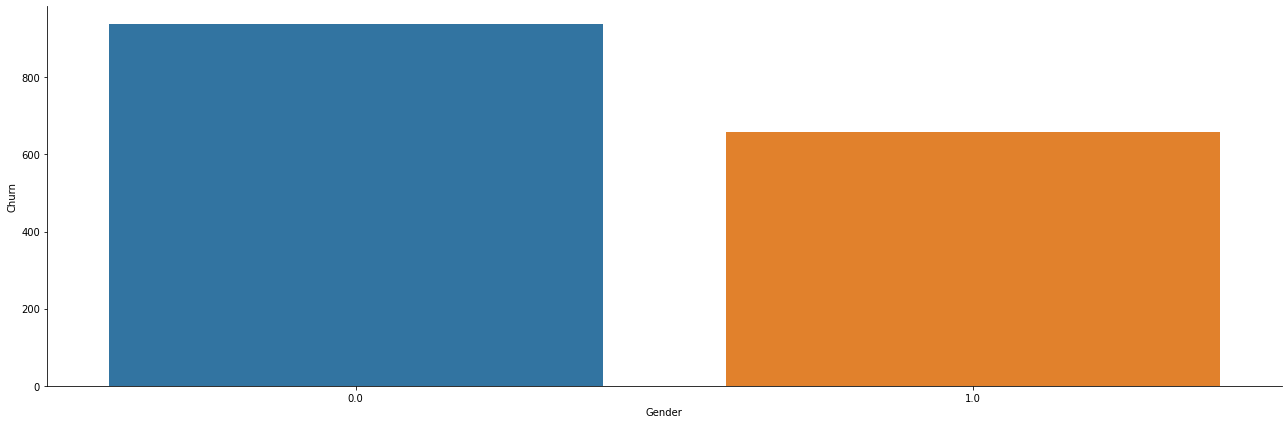

In [ ]:
print(XYZ3['Gender'].value_counts())
XYZ_Gender = XYZ3[XYZ3["Churn"] == 1]
print(XYZ_Gender['Gender'].value_counts())
XYZ_Gender = XYZ_Gender.groupby('Gender').agg({'Churn':'sum'}).reset_index().drop_duplicates()
sns.catplot(data=XYZ_Gender, x="Gender", y="Churn",  kind="bar", height=6, aspect=3)

# Analysis of Gender and Churn
* There is high churn amoun Male drivers as compared to Female Drivers but overall count Male Drivers is high, so this cannot contribute to any impact

In [ ]:
print(XYZ3.shape)
XYZ3['Churn'].value_counts()/len(XYZ3['Churn'])*100

(2368, 16)


1    67.398649
0    32.601351
Name: Churn, dtype: float64

The class imbalance will be taken care during model creation by using SMOTE technique. We will not use undersampling as majority class count is not high. Undersampling may cause underfit.

## Statistical summary of the derived dataset

In [ ]:
XYZ3.describe()

,Driver_id,Age,Gender,Education_Level,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last,Income_increase,Rating_increase,Churn,Tenure
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2.368000e+03,2368.000000,2368.000000,2368.000000,2368.000000,2368.0,2368.000000,2368.000000,2368.000000
mean,1396.682010,33.618243,0.411318,1.004223,1.814611,2.085726,2.576372e+06,58787.869088,58899.956081,1.478463,1.424409,0.0,0.149071,0.673986,1.842488
std,806.286557,5.931338,0.492177,0.815968,0.832284,0.927812,3.994392e+06,27577.207429,27657.151391,0.827521,0.803580,0.0,0.356234,0.468851,1.960778
min,1.000000,21.000000,0.000000,0.000000,1.000000,1.000000,-6.966100e+05,10747.000000,10747.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,694.750000,29.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,38991.500000,38991.500000,1.000000,1.000000,0.0,0.000000,0.000000,0.353190
50%,1398.500000,33.000000,0.000000,1.000000,2.000000,2.000000,7.330850e+05,55072.500000,55177.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.014395
75%,2097.250000,37.000000,1.000000,2.000000,2.000000,3.000000,3.201888e+06,75454.250000,75475.000000,2.000000,2.000000,0.0,0.000000,1.000000,2.553098
max,2788.000000,52.000000,1.000000,2.000000,5.000000,5.000000,2.090236e+07,145483.000000,145483.000000,4.000000,4.000000,0.0,1.000000,1.000000,9.760638


# Checking correlation among independent variables and how they interact with each other

In [ ]:
XYZ3.corr()

,Driver_id,Age,Gender,Education_Level,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last,Income_increase,Rating_increase,Churn,Tenure
Driver_id,1.000000,-0.008201,0.014257,-0.014671,-0.023384,-0.014598,0.012051,-0.017700,-0.018301,0.037065,0.010732,NaN,-0.008413,0.029286,0.023102
Age,-0.008201,1.000000,0.030222,-0.008221,0.081423,0.252994,0.299802,0.208297,0.211075,0.201114,0.141702,NaN,0.042941,-0.070751,0.283610
Gender,0.014257,0.030222,1.000000,-0.004327,-0.042731,0.005091,0.031459,0.017360,0.018301,-0.017658,0.022032,NaN,0.033264,0.004645,0.022331
Education_Level,-0.014671,-0.008221,-0.004327,1.000000,-0.005068,-0.029497,0.013942,0.128730,0.127965,0.032670,0.011440,NaN,0.029809,-0.006339,0.000362
Joining Designation,-0.023384,0.081423,-0.042731,-0.005068,1.000000,0.712129,-0.197930,0.477371,0.473803,-0.285208,-0.057284,NaN,0.080426,-0.127885,-0.116606
Grade,-0.014598,0.252994,0.005091,-0.029497,0.712129,1.000000,0.252043,0.729061,0.731845,0.023590,0.125708,NaN,0.109593,-0.221257,0.362494
Total Business Value,0.012051,0.299802,0.031459,0.013942,-0.197930,0.252043,1.000000,0.264462,0.272944,0.591228,0.615431,NaN,0.286837,-0.397889,0.782548
Income_first,-0.017700,0.208297,0.017360,0.128730,0.477371,0.729061,0.264462,1.000000,0.999480,0.112075,0.164439,NaN,0.113035,-0.192577,0.337628
Income_last,-0.018301,0.211075,0.018301,0.127965,0.473803,0.731845,0.272944,0.999480,1.000000,0.118582,0.171164,NaN,0.114887,-0.197103,0.342554
QR_first,0.037065,0.201114,-0.017658,0.032670,-0.285208,0.023590,0.591228,0.112075,0.118582,1.000000,0.357143,NaN,-0.098739,-0.110661,0.447237


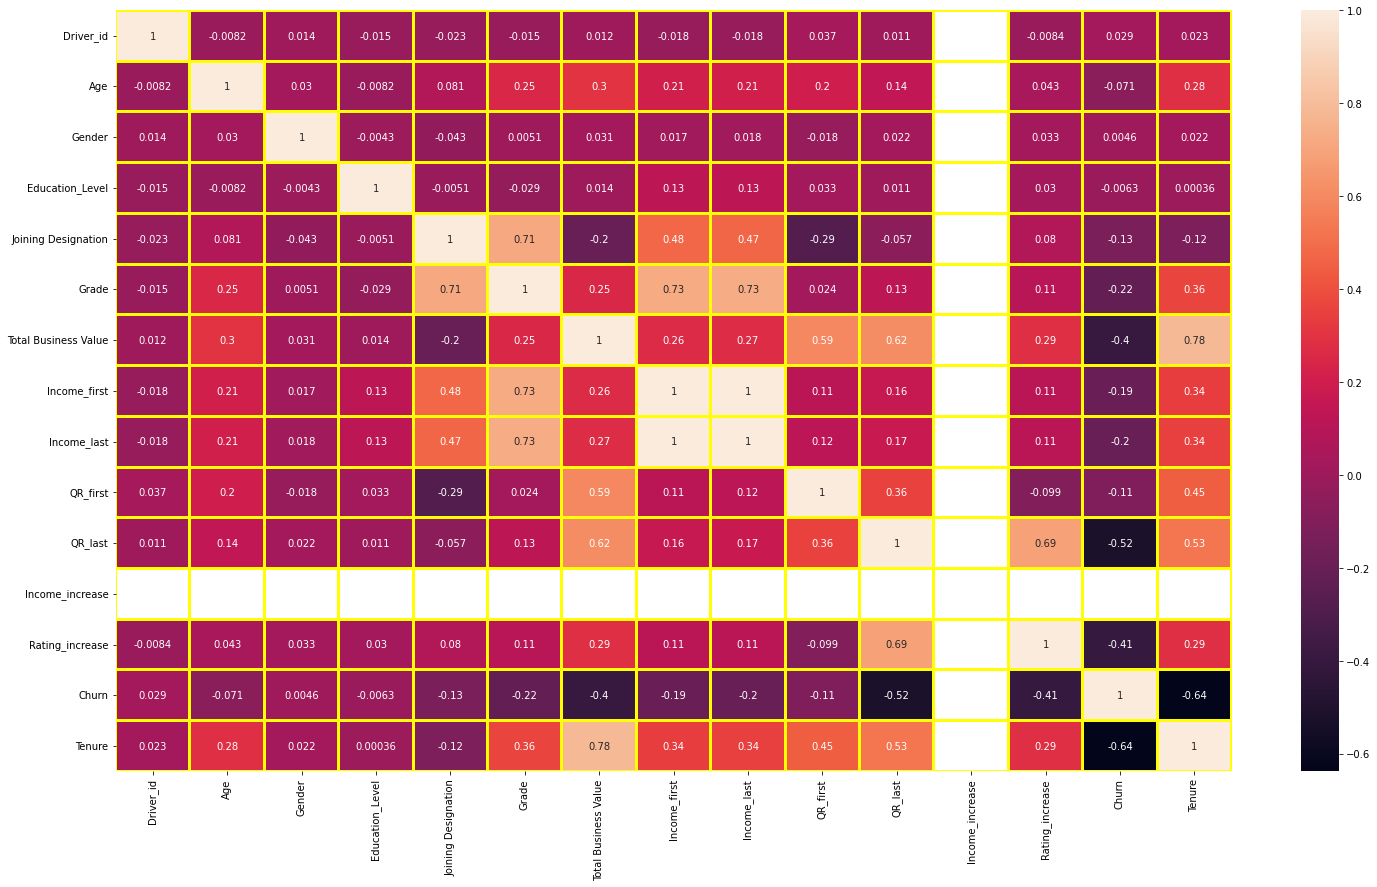

In [ ]:
fig, ax = plt.subplots(figsize=(25, 14))
hm = sns.heatmap(data = XYZ3.corr(), linewidths = 2, linecolor = 'yellow', annot = True, ax  = ax)
plt.show()

# Analysis of Coorelation Matrix

*   Last Quarterly Rating and Increase in Income have good relation with Churn as compared to other features
*   Grade and Joining Designation are positively corelated (0.71), Total Business Value and Quarterly Ratings are positively corelated (0.54)
*   Tenure has a good positive correlation with Total Business Value i.e. high tenure means more Total Business Value
*   Tenure has also strong negative relation with Chhurn. After working for long, people are likely to churn

# One HOT Encoding for Categorical Values
We will do ONE HOT ENCODING for only 2 Categorical feature - Gender, City
We will not do ONE HOT encoding for other categorical features like Education_Level, Joining Designation, Grade and Quarterly Rating as these features are already in numerical and their values are biased (like Quarterly Rating 5 is high and 1 is low) and not same like Gender (Male & Female are equally important).

In [ ]:
XYZ3 = pd.get_dummies(data = XYZ3, columns = ['Gender','City'])
XYZ3

,Driver_id,Age,Education_Level,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,2,1,1,-665480,57387,57387,2,2,...,0,0,0,0,0,0,0,0,0,0
1,2,31.0,2,2,2,0,67016,67016,1,1,...,0,0,0,0,0,0,0,1,0,0
2,4,43.0,2,2,2,350000,65603,65603,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5,29.0,0,1,1,120360,46368,46368,1,1,...,0,0,0,0,0,0,0,0,0,1
4,6,31.0,1,3,3,1265000,78728,78728,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2784,34.0,0,2,3,10037490,82815,82815,3,4,...,0,0,0,0,0,0,0,0,0,0
2364,2785,34.0,0,1,1,0,12105,12105,1,1,...,0,0,0,0,0,0,0,0,0,1
2365,2786,45.0,0,2,2,2815090,35370,35370,2,1,...,0,0,0,0,0,0,0,0,0,0
2366,2787,28.0,2,1,1,977830,69498,69498,2,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
XYZ3.corr()

,Driver_id,Age,Education_Level,Joining Designation,Grade,Total Business Value,Income_first,Income_last,QR_first,QR_last,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
Driver_id,1.000000,-0.008201,-0.014671,-0.023384,-0.014598,0.012051,-0.017700,-0.018301,0.037065,0.010732,...,0.016520,-0.026609,-0.007404,0.009588,0.009107,0.007108,0.001441,0.037341,-0.010967,0.014206
Age,-0.008201,1.000000,-0.008221,0.081423,0.252994,0.299802,0.208297,0.211075,0.201114,0.141702,...,0.014906,-0.037251,0.018649,-0.008258,0.008189,-0.009266,0.007492,-0.016415,0.012347,0.003917
Education_Level,-0.014671,-0.008221,1.000000,-0.005068,-0.029497,0.013942,0.128730,0.127965,0.032670,0.011440,...,-0.017437,0.004722,0.025183,0.013266,0.013644,0.033849,-0.027059,0.004976,-0.025519,0.007931
Joining Designation,-0.023384,0.081423,-0.005068,1.000000,0.712129,-0.197930,0.477371,0.473803,-0.285208,-0.057284,...,0.022306,-0.008331,0.050943,-0.033460,-0.010659,-0.007222,-0.024283,0.005518,0.020012,-0.006074
Grade,-0.014598,0.252994,-0.029497,0.712129,1.000000,0.252043,0.729061,0.731845,0.023590,0.125708,...,0.039605,0.000141,0.059485,-0.047449,-0.001542,-0.019607,-0.004302,-0.006316,0.022430,-0.021913
Total Business Value,0.012051,0.299802,0.013942,-0.197930,0.252043,1.000000,0.264462,0.272944,0.591228,0.615431,...,0.024423,0.008349,0.044024,-0.014211,-0.016451,-0.009374,0.011661,0.000950,0.015388,-0.021026
Income_first,-0.017700,0.208297,0.128730,0.477371,0.729061,0.264462,1.000000,0.999480,0.112075,0.164439,...,0.018864,-0.022654,0.029134,-0.004462,-0.015741,-0.003011,0.005357,0.011970,0.024821,-0.002056
Income_last,-0.018301,0.211075,0.127965,0.473803,0.731845,0.272944,0.999480,1.000000,0.118582,0.171164,...,0.018262,-0.022042,0.029863,-0.005212,-0.015776,-0.002684,0.006585,0.011745,0.025018,-0.001801
QR_first,0.037065,0.201114,0.032670,-0.285208,0.023590,0.591228,0.112075,0.118582,1.000000,0.357143,...,0.007813,0.009111,-0.015353,0.009111,-0.005300,-0.012355,-0.000915,0.009080,0.006486,-0.011322
QR_last,0.010732,0.141702,0.011440,-0.057284,0.125708,0.615431,0.164439,0.171164,0.357143,1.000000,...,0.010148,-0.003983,0.053987,0.004693,-0.028685,0.011474,0.005584,0.015515,0.019975,-0.032508


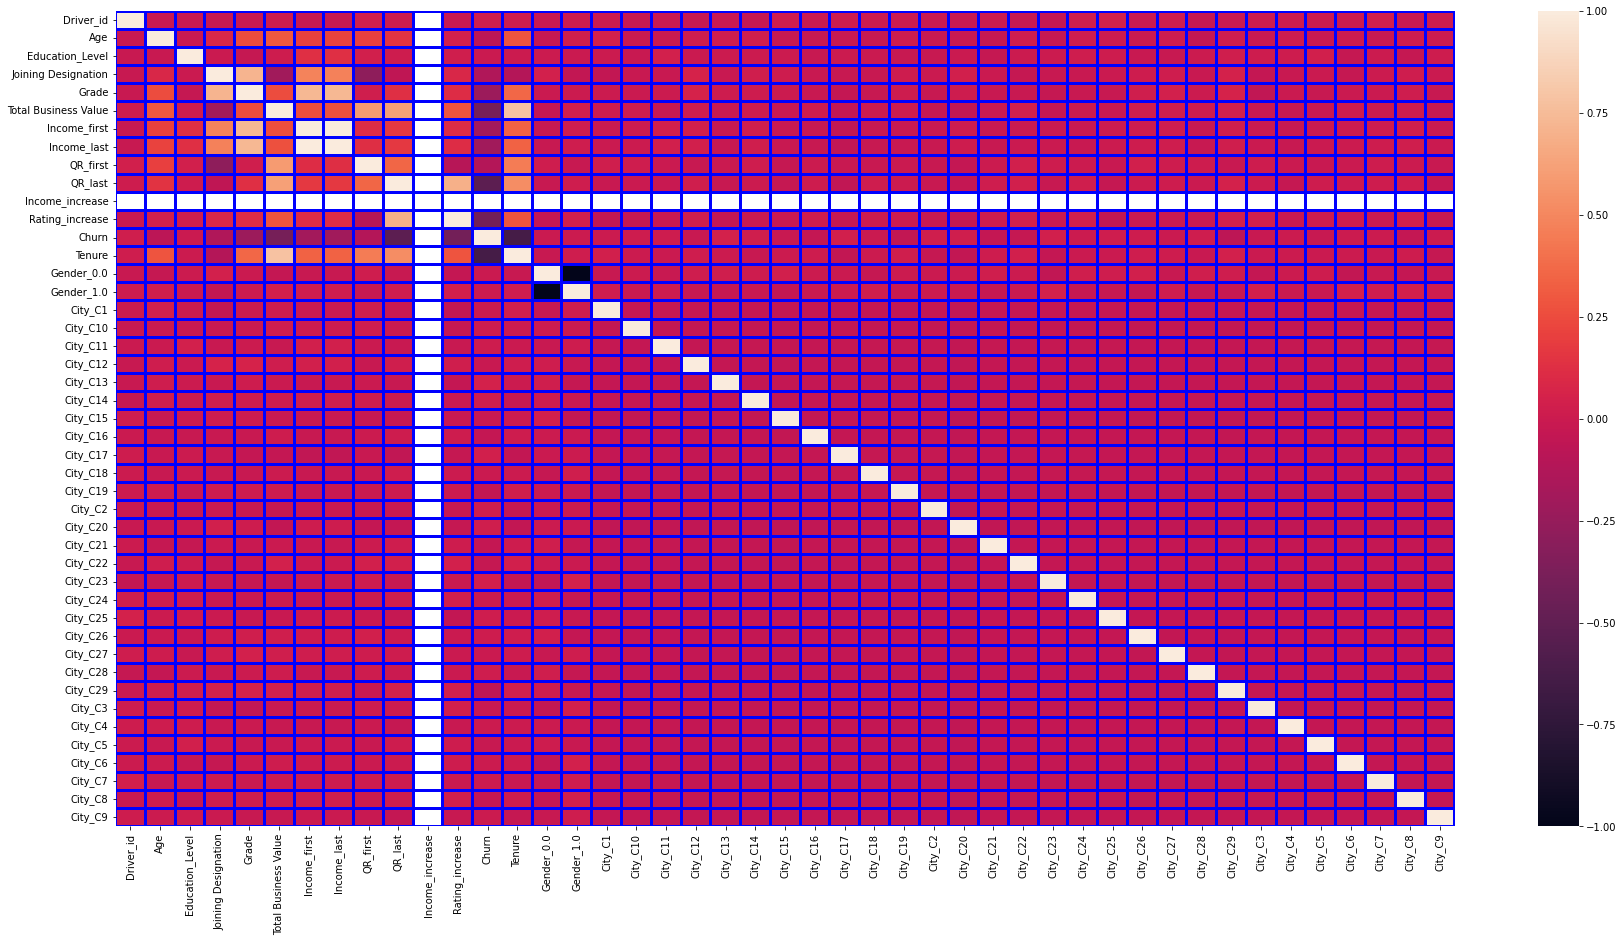

In [ ]:
fig, ax = plt.subplots(figsize = (30,15))
hm_new = sns.heatmap(data = XYZ3.corr(), ax = ax, linewidths = 2, linecolor = 'blue')

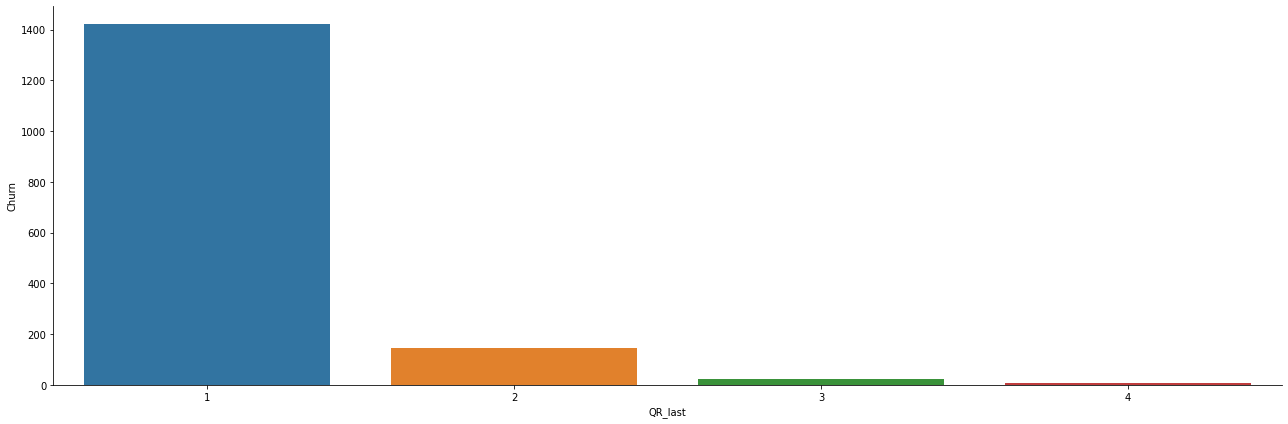

In [ ]:
XYZ_QR = XYZ3[XYZ3["Churn"] == 1]
XYZ_QR = XYZ_QR.groupby('QR_last').agg({'Churn':'sum'}).reset_index().drop_duplicates()
sns.catplot(data=XYZ_QR, x="QR_last", y="Churn",  kind="bar", height=6, aspect=3)

# Analysis of Last Quarterly Rating and Churn
* There is high churn when Drivers rating is low i.e. they are not performing well. In this it is very likely they will move out to some competitor

# ML Model Creation
We will be creating and testing following models

*   Logistic Regression
*   Decision Tree
*   Bagging
*   Boosting

## Results Evaluation:

*   Classification Report
*   ROC AUC curve



In [ ]:
## importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Creating Y as Target Variable and X as input variables
y = XYZ3['Churn']
X = XYZ3.drop(columns = ['Churn'])


# Scaling of Training Data

In [ ]:
## Standard Scaling for Independent Training Variables (No need Scaling training Dependent variable since its Binary - 0 and 1)
from sklearn.preprocessing import StandardScaler

## Splitting data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

SS= StandardScaler()
XYZ3_SS = SS.fit_transform(X_train)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

## Creating object of the model and Training it
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
## Predicting the model for Test Data
y_hat = LR.predict(X_test)

## Checking Matrices
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[ 60  88]
 [ 30 296]]
======Accuracy Score===========
0.75
===========F1 Score============
0.83
========AUC ROC Score==========
0.71


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## Creating object of the model and Training it
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
## Predicting the model for Test Data
y_hat = dct.predict(X_test)

## Checking Matrices
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, dct.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[139   9]
 [ 16 310]]
======Accuracy Score===========
0.95
===========F1 Score============
0.96
========AUC ROC Score==========
0.95


# Ensembiling Technique - Baggging - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

## Checking Matrices
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[141   7]
 [ 16 310]]
======Accuracy Score===========
0.95
===========F1 Score============
0.96
========AUC ROC Score==========
0.98


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 2)
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

## Checking Matrices
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[ 90  58]
 [ 10 316]]
======Accuracy Score===========
0.86
===========F1 Score============
0.9
========AUC ROC Score==========
0.95


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

## Checking Matrices
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[139   9]
 [ 15 311]]
======Accuracy Score===========
0.95
===========F1 Score============
0.96
========AUC ROC Score==========
0.98


# Ensembiling Technique - Boosting - GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 10)
gbc.fit(X_train, y_train)
y_hat = gbc.predict(X_test)

## Checking Matrices
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[141   7]
 [ 16 310]]
======Accuracy Score===========
0.95
===========F1 Score============
0.96
========AUC ROC Score==========
0.99


# Ensembiling Technique - Boosting - XGB

In [ ]:
import xgboost as xgb
xgbclf  = xgb.XGBClassifier()
xgbclf.fit(X_train, y_train)
y_hat = xgbclf.predict(X_test)

## Checking Matrices
print("======Confusion Matrix=========")
print(confusion_matrix(y_test, y_hat))
print("======Accuracy Score===========")
print(round(accuracy_score(y_test, y_hat),2))
print("===========F1 Score============")
print(round(f1_score(y_test,y_hat),2))
print("========AUC ROC Score==========")
print(round(roc_auc_score(y_test, xgbclf.predict_proba(X_test)[:, 1]),2))
print("================================")

======Confusion Matrix=========
[[143   5]
 [ 13 313]]
======Accuracy Score===========
0.96
===========F1 Score============
0.97
========AUC ROC Score==========
0.99


Tried many Models - LR, DT, RF and XGB. The performance of model increased from LR to DT to RF and then XGB even with just minor hypertuning of estimators and max depth.

# INSIGHTS

*   Ratio of Male vs Female Driver is around 58% vs 42%
*   The count of Drivers into different education level categories is almost close. The maximum number of Drivers are 12+, then Graduate. 10+ has lowest count.
*   50% of the Drivers had joined at Designation = 1.
*   Around 40% of the Drivers have Grade = 2, followed by Grade 1. Grade 5 has least no. of Drivers
*   There is no Driver with quarterly rating of 5 which is considered as best rating.. Maximum Drivers (around 45%) have bad rating of 1. Around 30% of Drivers have atleast average quarterly rating .
*   The average Tenure of a XYZ driver is 1.8 Years
*   75% of Drivers have less than 2.55 years of job in XYZ.
*   There is not much difference between experience of Drivers basis Gender
*   Last Quarterly Rating and Increase in Income have good relation with Churn as compared to other features
*   Grade and Joining Designation are positively corelated , Total Business Value and Quarterly Ratings are positively corelated (0.54)
*   Tenure has a good positive correlation with Total Business Value i.e. high tenure means more Total Business Value
*   Tenure has also strong negative relation with Churn. After working for long, people are likely to churn
*   City 20 has highest Driver Churn which is exceptionally high.
*   Least Churn is with Driver with education level of 1 (i.e. 12+)
* There is high churn when Drivers rating is low i.e. they are not performing well. In this it is very likely they will move out to some competitor

#Recommendation
* XYZ should focus on why Driver of City 20 have highest Churn and try to fix it.
* Least Churn is with Driver with education level of 1 (i.e. 12+), so hiring people with 12+ may reduce churn.
* There is high churn amoun Male drivers as compared to Female Drivers but overall count Male Drivers is high, so this cannot contribute to any impact
* There is high churn when Drivers rating is low i.e. they are not performing well. In this it is very likely they will move out to some competitor. It should be reviewed why many drivers are not performing well and focus on getting it addressed, so that they can perform better and can stay with XYZ
